<a href="https://colab.research.google.com/github/araldi/HS22_Big-Data-analysis-in-Biomedical-Research/blob/main/Week_04/07_Python_data_visualization_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Anatomy of a figure



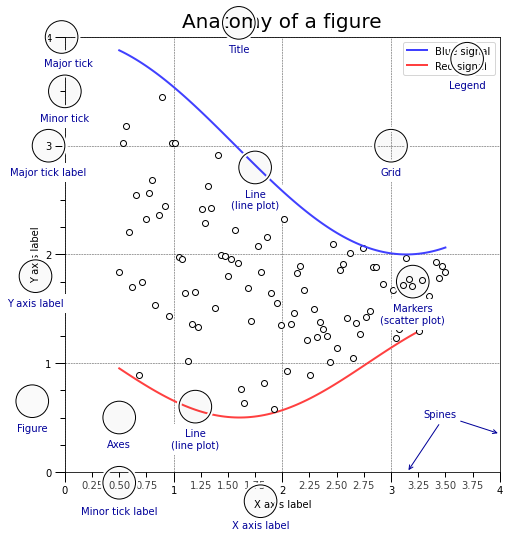

In [ ]:
# Figure adapted from here:
# https://github.com/rougier/scientific-visualization-book/blob/master/code/anatomy/anatomy.py


#more here:
# https://github.com/rougier/scientific-visualization-book


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(123)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x


ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which="major", width=1.0)
ax.tick_params(which="major", length=10)
ax.tick_params(which="minor", width=1.0, labelsize=10)
ax.tick_params(which="minor", length=5, labelsize=10, labelcolor="0.25")

ax.grid(linestyle="--", linewidth=0.5, color=".25", zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0, marker="o", markerfacecolor="w", markeredgecolor="k")

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment="bottom")
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke

    circle = Circle(
        (x, y),
        radius,
        clip_on=False,
        zorder=10,
        linewidth=1,
        edgecolor="black",
        facecolor=(0, 0, 0, 0.0125),
        path_effects=[withStroke(linewidth=5, foreground="w")],
    )
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(
        x,
        y,
        text,
        backgroundcolor="white",
        # fontname="Yanone Kaffeesatz", fontsize="large",
        ha="center",
        va="top",
        weight="regular",
        color="#000099",
    )


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = "#000099"
ax.annotate(
    "Spines",
    xy=(4.0, 0.35),
    xytext=(3.3, 0.5),
    color=color,
    weight="regular",  # fontsize="large", fontname="Yanone Kaffeesatz",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
)

ax.annotate(
    "",
    xy=(3.15, 0.0),
    xytext=(3.45, 0.45),
    color=color,
    weight="regular",  # fontsize="large", fontname="Yanone Kaffeesatz",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
)

# plt.savefig("../../figures/anatomy/anatomy.pdf")
plt.show()

# Types of graphs


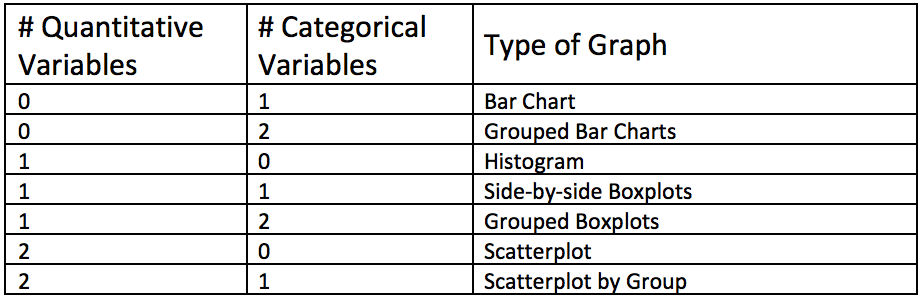

## With categorical data

*   Bar chart (great for counts)
*   Boxplot


## With quantitative data

* Line plot  
* Histogram
*   Scatterplot (with regression line)


Load the data and prepare the datasets

In [ ]:
df = pd.read_csv('https://github.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/numpy/Week2_homework_data.csv?raw=true')

In [ ]:
df.head()

,Unnamed: 0,31-0.0,48-0.0,49-0.0,50-0.0,21002-0.0
0,0,0.0,80.0,103.0,169.0,68.6
1,1,0.0,80.0,96.0,185.0,70.2
2,2,1.0,89.0,97.0,164.0,71.5
3,3,0.0,101.0,108.0,159.0,82.9
4,4,1.0,97.0,107.0,186.0,94.0


In [ ]:
dictionary = pd.read_csv('https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/numpy/Week2_homework_dictionary.csv')
dictionary.head()

,Unnamed: 0,Description,Code
0,0,Gender,31-0.0
1,1,Height [cm],50-0.0
2,2,Weight [Kg],21002-0.0
3,3,Waist circumference [cm],48-0.0
4,4,Hip circumference [cm],49-0.0


In [ ]:
# rename the dataframe columns

# dictionary comprehenesion converts a tuple in a dictionary
# dict((key, func(key)) for key in keys)
dictionary_columns = dict( (dictionary.loc[i, 'Code'], dictionary.loc[i, 'Description']) for i in dictionary.index)

# or using zip (makes tuples out of equally sized series/arrays)
dictionary_columns = dict(zip(dictionary['Code'], dictionary['Description']))

df = df.rename(columns = dictionary_columns)

df.head()

,Unnamed: 0,Gender,Waist circumference [cm],Hip circumference [cm],Height [cm],Weight [Kg]
0,0,0.0,80.0,103.0,169.0,68.6
1,1,0.0,80.0,96.0,185.0,70.2
2,2,1.0,89.0,97.0,164.0,71.5
3,3,0.0,101.0,108.0,159.0,82.9
4,4,1.0,97.0,107.0,186.0,94.0


In [ ]:
!wget https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv
sales_data = pd.read_csv('company_sales_data.csv')

--2022-10-12 15:22:27--  https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv
Resolving pynative.com (pynative.com)... 172.66.43.37, 172.66.40.219, 2606:4700:3108::ac42:28db, ...
Connecting to pynative.com (pynative.com)|172.66.43.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 659 [text/csv]
Saving to: ‘company_sales_data.csv’

company_sales_data. 100%[===================>]     659  --.-KB/s    in 0s      

2022-10-12 15:22:27 (46.5 MB/s) - ‘company_sales_data.csv’ saved [659/659]



In [ ]:
sales_data

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


In [ ]:
SNPs = pd.read_csv("https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/pandas/CD93_exomeSNPs_annotation.csv")
SNPs.head()

,Unnamed: 0,Variant name,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
0,0,rs7492,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079620,23079620
1,1,rs2567612,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082535,23082535
2,2,rs2749811,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079544,23079544
3,3,rs2749812,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082290,23082290
4,4,rs2749813,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082347,23082347


In [ ]:
# import useful datasets
chipotle = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep= '\t')
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
#